In [126]:
import math
from functools import reduce
from __future__ import division
from collections import Counter

def shape(matrix):
    num_rows = len(matrix);
    num_cols = len(matrix[0]);
    
    return num_rows, num_cols;

def get_row(matrix, row_index):
    return matrix[row_index]

def get_column(matrix, column_index):
    return [m_i[column_index] for m_i in matrix]

def vector_add(v1, v2):
    return [x + y for x, y in zip(v1, v2)]

def vector_subtract(v1, v2):
    return [x - y for x, y in zip(v1, v2)];

def vector_sum(vectors):
    return reduce(vector_add, vectors);

def scalar_multiply(num, vector):
    return [num * x for x in vector]

def vector_mean(vectors):
    n = len(vectors);

    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v,w):
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def distance(v, w):
    return magnitude(vector_subtract(v, w))

def mean(x):
    return sum(x) / len(x)

def median(v):
    n = len(v);
    sorted_v = sorted(v);
    midpoint = n // 2;
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else: 
        return mean([sorted_v[midpoint], sorted_v[midpoint-1]])

def quantile(x, p):
    p_index = int(p * len(x));

    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x);
    max_count = max(counts.values());
    return [x_i for x_i, count in counts.items()
           if count == max_count
           ]
## Amplitude is already used in python, so I've putted date_range
def data_range(vector):
    return max(vector) - min(vector)

def de_mean(v):
    v_bar = mean(v);
    return [v_i - v_bar for v_i in v]

def variance(v):
    n = len(v);
    desviations = de_mean(v);
    return sum_of_squares(desviations) / (n - 1)

def standard_desviation(x_variance):
    return math.sqrt(variance(x_variance))

def interquantile_range(v):
    return quantile(v, 0.75) - quantile(v, 0.25)

def covariance(v1, v2):
    n = len(v1);
    return dot(de_mean(v1), de_mean(v2)) / (n - 1)

def correlation(v1, v2):
    stedv_v1 = standard_desviation(v1);
    stedv_v2 = standard_desviation(v2);

    if stedv_v1 > 0 and stedv_v2 > 0:
        return covariance(v1, v2) / stedv_v1 / stedv_v2
    else:
        return 0

In [192]:
from matplotlib import pyplot as plt;

num_friends = [40, 50, 60, 30, 45, 77, 80, 31, 32, 100];
daily_minutes_online = [120, 130, 150, 100, 125, 160, 165, 100, 122, 180];

correlation(num_friends, daily_minutes_online)

0.9701365270292865

## Let's plot this correlation 😃

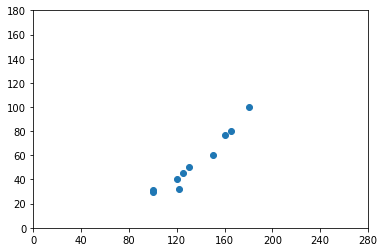

In [193]:
plt.scatter(daily_minutes_online, num_friends)
plt.yticks(range(0, 200, 20))
plt.xticks(range(0, 300, 40))
plt.show()